In [1]:
import sklearn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seed = 0
X, y = make_regression(n_features=1,noise=10,random_state=seed)
y += 10

$$minimize ((X  A - y)^2)$$
$$=> X A = y$$
$$=> \mathbf{X}^\intercal . X . A = \mathbf{X}^\intercal y$$
$$=> A = (\mathbf{X}^\intercal . X)^{-1} \mathbf{X}^\intercal y$$
$$ B = (y - X . A).mean()$$

In [3]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression().fit(X, y)
class CustomLinearReg():
    def fit(self,X,y):
        # https://en.wikipedia.org/wiki/Linear_least_squares#Example
        assert X.shape[0] == y.shape[0]
        coef = np.linalg.inv(X.T @ X) @ X.T @ y
        intercept = (y - X @ coef).mean()
        self.coef = coef
        self.intercept = intercept
        
        return self
    def predict(self,X):
        return X * self.coef + self.intercept
# X = np.array([[1,0],[0,1],[1,1]])
# y = np.array([1,1,0])
custom = CustomLinearReg().fit(X,y)
(model.coef_, model.intercept_),(custom.coef,custom.intercept)

((array([42.61943029]), 9.185818172969272),
 (array([43.15835869]), 9.153585935130724))

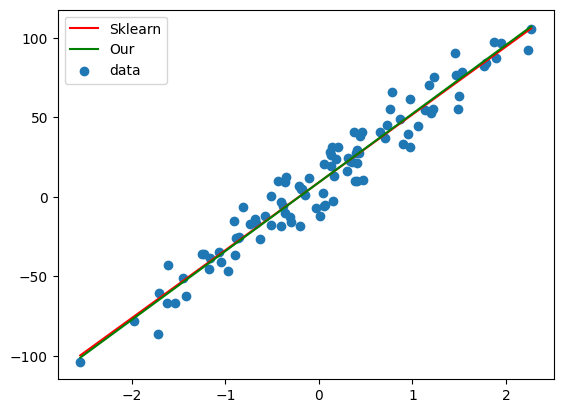

In [4]:
import numpy as np
a = np.linspace(X.min(), X.max(), 100)[:, None]
plt.plot(a, model.predict(a), color="r",label="Sklearn")
plt.plot(a, custom.predict(a), color="g",label="Our")
plt.scatter(X, y,label="data")
plt.legend()